# Portfolio 4



### Introduction
The increasing demand for portable computing devices has led to the rapid expansion of the laptop market. Laptops come in a wide range of configurations, from basic models for everyday tasks to high-performance machines for professional and gaming purposes. Because of this diversity in the market, laptop prices can vary significantly based on various factors such as brand, RAM, processor type, storage capacity, and more. Consumers and businesses often face challenges when determining the best value-for-money option when purchasing a laptop.


The primary purpose of this analysis is to explore the factors that influence laptop prices and to build predictive models to estimate the cost of a laptop based on its features. By understanding which features contribute the most to price variation, consumers and sellers can make more informed decisions. This analysis will use machine learning techniques to achieve the following objectives:
1. Feature Exploration: Identify and analyse the key features significantly affecting laptop prices. This will involve exploring the relationships between price and features such as RAM, Processor, Storage, and Brand.
2.  Price Prediction: Build and compare different machine learning models to predict laptop prices based on their specifications.This cas includes a linear regression baseline model and explore more advanced models, such as polynomial regression and recursive feature elimination (RFE).
3. Performance Evaluation: Evaluate the predictive models' performance using metrics such as Mean Squared Error (MSE) and R-squared (R²) to determine which model best captures the variation in laptop prices.
4.  Business Insights: Provide insights into which features most influence laptop pricing. This will help consumers understand what factors drive laptop prices, which could help them make better purchasing decisions or identify high-value products.


### Research Questions:

1.	What are the most important features that influence the price of laptops?
2. How well can different machine learning algorithms predict laptop prices?
3. Can we improve prediction accuracy by using advanced models like polynomial regression or feature selection techniques like RFE?

In [101]:
student_name = "Mohammadpouya Alavi Naeini"
student_id = "48160202"

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore')

### Data Loading and Exploration


In [103]:
# Load the dataset
data = pd.read_csv('Laptop-Price.csv')

# Display the first few rows of the dataset
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.9


In [104]:
# Get a summary of the dataset
data.info()

# Show statistical summary of numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Price_euros       1146 non-null   float64


,Inches,SSD,HDD,Flash Storage,Hybrid,Price_euros
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,15.151396,201.657941,382.834206,1.898778,0.539267,1204.876972
std,1.319303,185.037369,461.918856,26.275202,15.035060,676.630847
min,11.300000,0.000000,0.000000,0.000000,0.000000,265.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,699.750000
50%,15.600000,256.000000,0.000000,0.000000,0.000000,1049.750000
75%,15.600000,256.000000,1000.000000,0.000000,0.000000,1535.000000
max,18.400000,1000.000000,1000.000000,512.000000,508.000000,6099.000000


### Exploring Data Types and Missing Values

In [123]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)



Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
OpSys               0
Cpu Brand           0
Cpu Model           0
Cpu Rate            0
SSD                 0
HDD                 0
Flash Storage       0
Hybrid              0
Gpu Brand           0
Gpu Model           0
Price_euros         0
dtype: int64


### Univariate Analysis

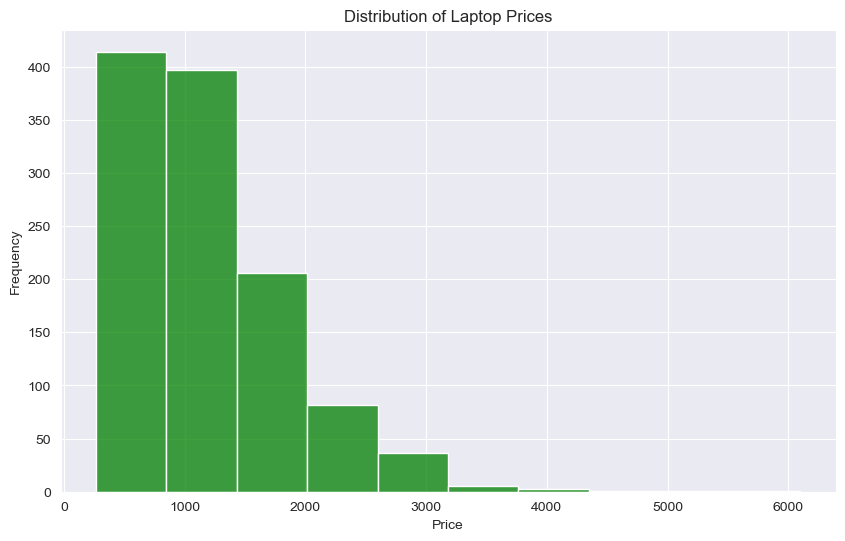

In [119]:
# Target Variable (Price): Visualise the distribution of laptop prices

# Plot distribution of laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_euros'], bins=10 , color='green')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

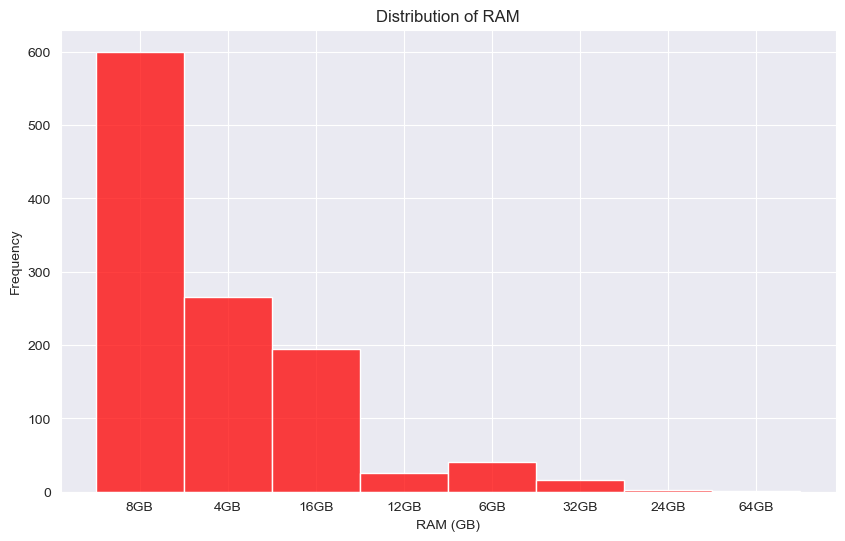

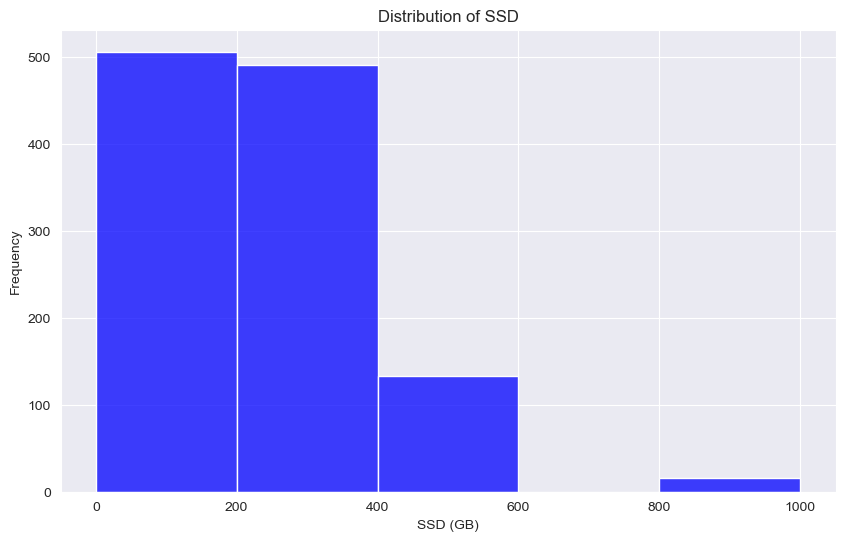

In [120]:
#Numerical Features: distribution of numerical features such as RAM and SSD

# Plot distribution of RAM
plt.figure(figsize=(10, 6))
sns.histplot(data['Ram'], bins=10, color='red')
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Storage
plt.figure(figsize=(10, 6))
sns.histplot(data['SSD'], bins=5, color='blue')
plt.title('Distribution of SSD')
plt.xlabel('SSD (GB)')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

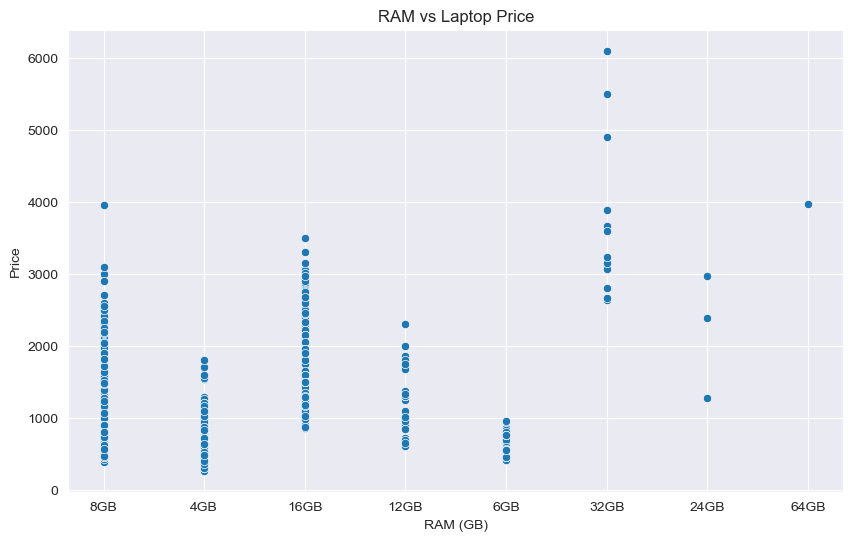

In [108]:
# RAM vs. Price: how RAM affects laptop prices using a scatter plot

# Scatter plot of RAM vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=data)
plt.title('RAM vs Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

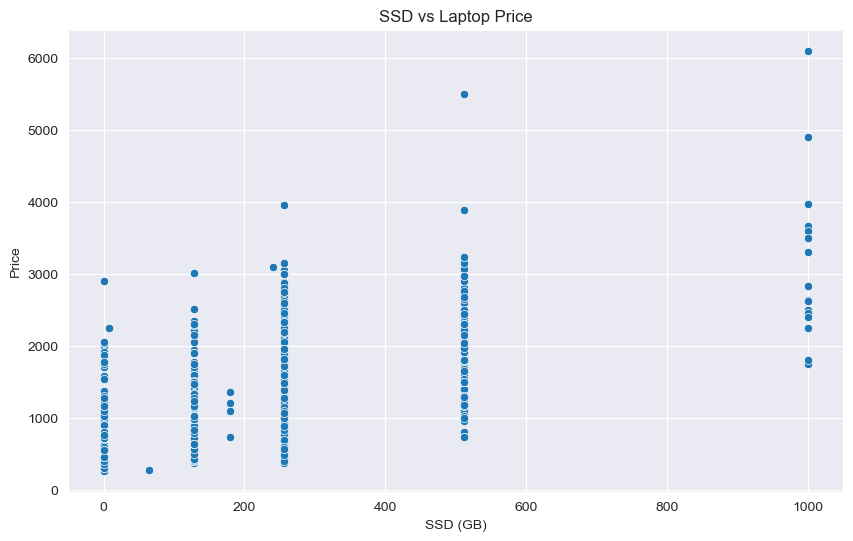

In [109]:
# SSD vs. Price: analyse the relationship between SSD and Price using scatter plot

# Scatter plot of SSD vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSD', y='Price_euros', data=data)
plt.title('SSD vs Laptop Price')
plt.xlabel('SSD (GB)')
plt.ylabel('Price')
plt.show()

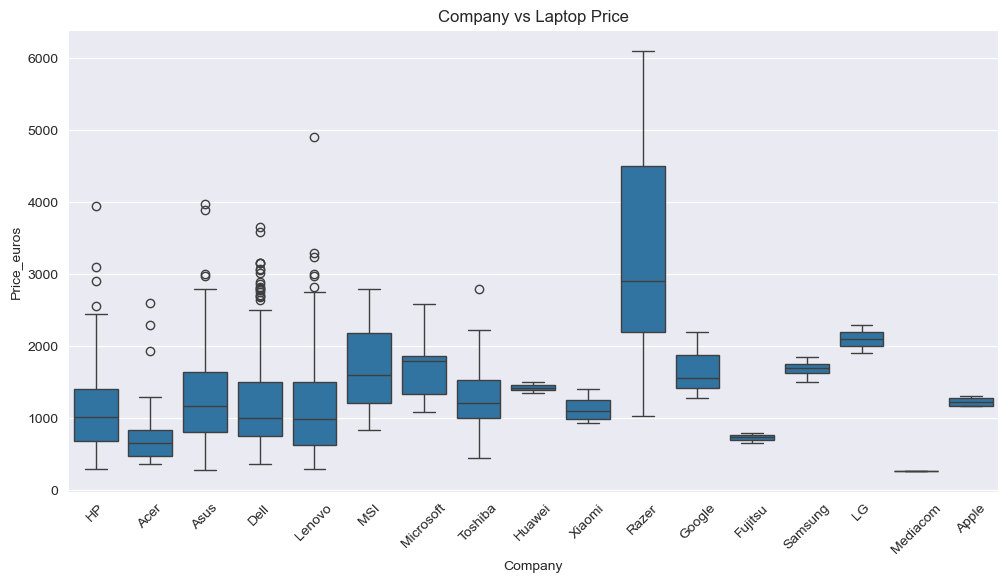

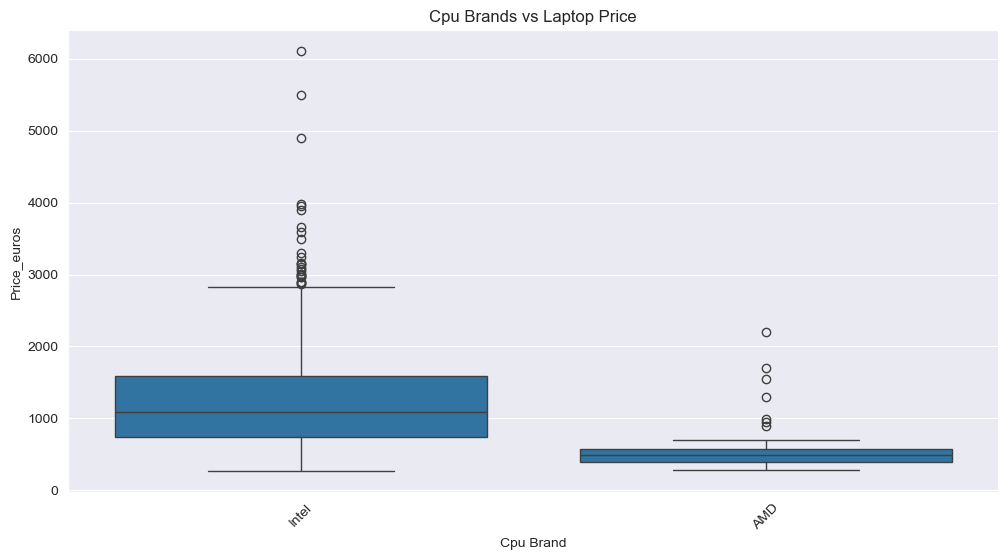

In [110]:
# Categorical Features : visualising the variation in price for categorical variables like Company and Processor using box plots

# Box plot of Company vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=data)
plt.title('Company vs Laptop Price')
plt.xticks(rotation=45)
plt.show()

# Box plot of Cpu Brand vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cpu Brand', y='Price_euros', data=data)
plt.title('Cpu Brands vs Laptop Price')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

In [111]:
# Select  the numerical columns
numerical_data = data[['Price_euros', 'Inches', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Extract the correlation between 'Price_euros' and the other columns
price_correlations = correlation_matrix['Price_euros'].drop('Price_euros') 

# Display the result
print(price_correlations)

Inches          -0.025176
SSD              0.642065
HDD             -0.135846
Flash Storage    0.022907
Hybrid          -0.008984
Name: Price_euros, dtype: float64


###  Linear Regression

In [129]:
# Step 1: Define features and target variable
features = data[['Inches', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']]
target = data['Price_euros']

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the linear regression model
linear_model_reg = LinearRegression()
linear_model_reg.fit(X_train, y_train)

# Step 4: Predict on the test set
y_predict_linear = linear_model_reg.predict(X_test)

# Step 5: Evaluate the linear model
mse_linear = mean_squared_error(y_test,y_predict_linear)                   
r2_linear = r2_score(y_test, y_predict_linear)

print(f'Linear Regression -> MSE: {mse_linear:.2f}, R-squared: {r2_linear:.2f}')

Linear Regression -> MSE: 254259.62, R-squared: 0.47


### Polynomial Regression

In [113]:
# Step 1: Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train the linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Step 3: Predict on the test set using polynomial features
y_predict_poly = poly_model.predict(X_test_poly)

# Step 4: Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_predict_poly)
r2_poly = r2_score(y_test, y_predict_poly)

print(f'Polynomial Regression (Degree 2) -> MSE: {mse_poly:.2f}, R-squared: {r2_poly:.2f}')

Polynomial Regression (Degree 2) -> MSE: 234468.42, R-squared: 0.52


### Recursive Feature Elimination (RFE)

In [114]:
# Step 1: Apply RFE to select the top 2 features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe.fit(X_train, y_train)

# Step 2: Transform the training and testing data to include only selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Step 3: Train a linear regression model using the selected features
rfe_model = LinearRegression()
rfe_model.fit(X_train_rfe, y_train)

# Step 4: Predict on the test set using selected features
y_predict_rfe = rfe_model.predict(X_test_rfe)

# Step 5: Evaluate the RFE model
mse_rfe = mean_squared_error(y_test, y_predict_rfe)
r2_rfe = r2_score(y_test, y_predict_rfe)

print(f'RFE (Top 2 Features) -> MSE: {mse_rfe:.2f}, R-squared: {r2_rfe:.2f}')

# Step 6: Display selected features
selected_features = X_train.columns[rfe.support_]
print(f'Selected Features by RFE: {list(selected_features)}')

RFE (Top 2 Features) -> MSE: 273489.37, R-squared: 0.43
Selected Features by RFE: ['Inches', 'SSD']


### Classification (K-Nearest Neighbors (KNN))

In [141]:
# Binning price into categories: low, medium, high
price_bins = pd.qcut(target, q=3, labels=["low", "medium", "high"])
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(features, price_bins, test_size=0.2, random_state=42)

# Set up the KNN classifier with grid search to optimize k
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 30)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bin, y_train_bin)

# Best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k: {best_k}')

# Train KNN with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train_bin, y_train_bin)
knn_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_predict_knn_reg = knn_regressor.predict(X_test)
y_predict_knn = knn.predict(X_test_bin)

# Calculate MSE and r2 for KNN Regressor
mse_knn = mean_squared_error(y_test, y_predict_knn_reg)
r2_knn = r2_score(y_test, y_predict_knn_reg)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test_bin, y_predict_knn)
f1_knn = f1_score(y_test_bin, y_predict_knn, average='weighted')

print(f'KNN -> Accuracy: {accuracy_knn:.2f}, F1-score: {f1_knn:.2f}')
print(f'KNN Regressor -> MSE: {mse_knn:.2f}, R-squared: {r2_knn:.2f}')

Best k: 21
KNN -> Accuracy: 0.60, F1-score: 0.59
KNN Regressor -> MSE: 240632.08, R-squared: 0.50


### Model Evaluation

In [151]:
# Summary of model performance
performance_data = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'RFE (Top 3 Features)', 'KNN (Classification)'],
    'MSE': [mse_linear, mse_poly, mse_rfe,  mse_knn],
    'R-squared': [r2_linear, r2_poly, r2_rfe, r2_knn],
}

# Create a DataFrame for better visualization
performance_df = pd.DataFrame(performance_data)

# Display the performance metrics
performance_df

,Model,MSE,R-squared
0,Linear Regression,254259.616512,0.474223
1,Polynomial Regression,234468.416821,0.515149
2,RFE (Top 3 Features),273489.365455,0.434458
3,KNN (Classification),240632.077976,0.502403


### Mean Squared Error (MSE) Comparison

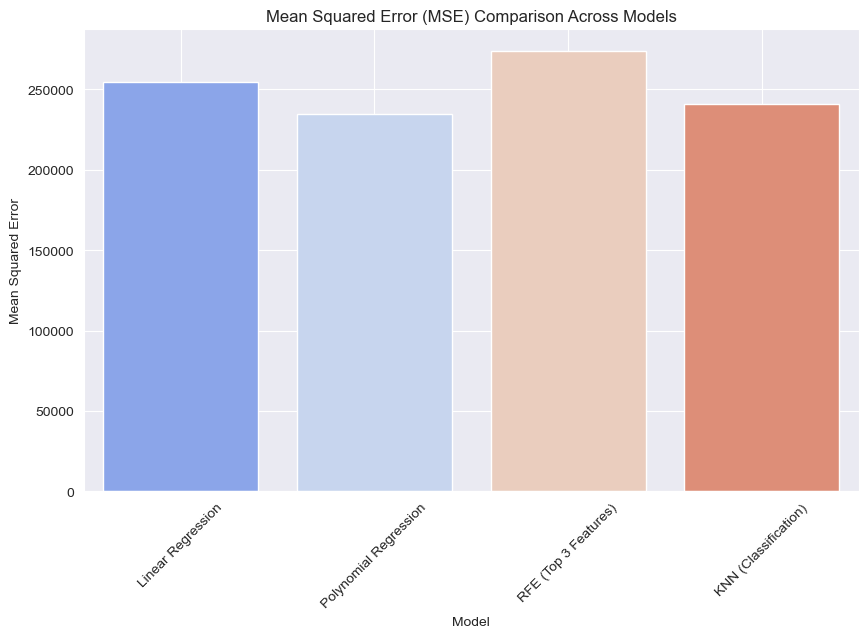

In [145]:
# Set up the bar plot for MSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=performance_df, palette='coolwarm')
plt.title('Mean Squared Error (MSE) Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###  R-squared Comparison

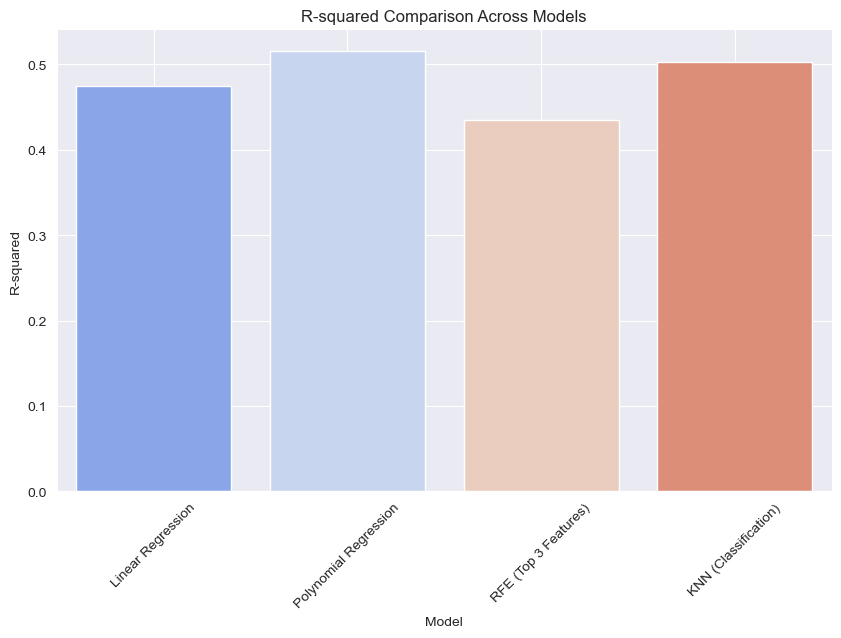

In [146]:
# Set up the bar plot for R-squared comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=performance_df, palette='coolwarm')
plt.title('R-squared Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Interpretation of Results

1. Linear Regression:

   The MSE is high (254,259.62), and the R-squared value is low (0.47). This indicates that while the linear regression model captures some variation in the data, it struggles to account for much of the variance in laptop prices. The linear model performs below expectations compared to more advanced models due to its inability to capture non-linear relationships in the data.
	  
2. Polynomial Regression (Degree 2):

   The MSE is slightly lower (234,468.42) than linear regression', and the R-squared value is higher (0.52). This suggests that polynomial regression can better capture the non-linear relationships between the features and laptop prices. The performance improvement demonstrates that adding polynomial terms helps explain more variance in laptop prices, though the improvement is marginal.
   
3. RFE (Recursive Feature Elimination - Top 2 Features):

   The MSE is higher (273,489.37) than linear regression, and the R-squared is lower (0.43). This indicates that selecting only the top 2 features using RFE resulted in a model that performs worse than linear and polynomial regression. The additional features excluded by RFE still seem to play an essential role in predicting laptop prices, suggesting that reducing the number of features too drastically may omit valuable information.
   
4. KNN Regressor (Best k: 21):

    MSE for the KNN Regressor is 240,632.08, and the R-squared value is 0.50, making it comparable to the polynomial regression model. This demonstrates that the KNN Regressor performs better than linear regression and slightly below polynomial regression. The KNN Regressor can capture non-linear relationships, making it a viable option for predicting laptop prices.
   
5. KNN Classifier (Best k: 21):

	The Accuracy is 0.60, and the F1-score is 0.59, indicating that KNN Classification does a reasonable job of categorising laptops into different price ranges. However, its performance is moderate, likely because the problem may be better suited for regression models rather than classification.

Conclusion:

   Polynomial Regression (Degree 2) performed the best overall, achieving the lowest MSE and the highest R-squared value. This demonstrates that non-linear relationships exist between the features and laptop prices, which linear regression alone cannot capture effectively.
	     
   Recursive Feature Elimination (RFE) did not improve performance in this case, as removing key features led to worse results. This suggests that the excluded features still contain valuable information that contributes to the prediction of laptop prices. Reducing the number of features too much may lead to losing necessary predictive power.
   
   KNN Regressor performed similarly to polynomial regression, showing that non-parametric models like KNN can also capture non-linear relationships, though it slightly underperformed compared to polynomial regression.
	
   KNN Classifier offered a moderate classification accuracy, but classification might not be the most suitable approach for this task since predicting exact prices is more appropriate in a regression context.


### summarise findings an insights from the analysis

1. Feature Importance:

   From our exploration and modelling efforts, features like Inches and SSD significantly impacted the prediction of laptop prices. These features had stronger correlations with Price than other features like HDD and Hybrid. However, while Recursive Feature Elimination (RFE) identified the top 2 features, reducing the number of features could have improved model performance. This indicates that other features, even those with weaker correlations, still contribute valuable information for predicting prices.

2. Model Performance:

	Linear Regression: This model provided a reasonable baseline, with an MSE of 254,259.62 and an R-squared of 0.47. While it captures some of the variation in the data, it needs help modeling the complexities and non-linear relationships between the features and price.
	
	Polynomial Regression (Degree 2): This model outperformed linear regression with an MSE of 234,468.42 and an R-squared of 0.52. By introducing non-linearity through polynomial features, this model was able to capture more complex relationships between the features and price. Although the improvement is not substantial, it demonstrates that some features may have non-linear effects on the price.
	
	Recursive Feature Elimination (RFE): Despite reducing the model to the top 2 most essential features, impact predicting laptop prices significantly, the MSE of 273,489.37 and R-squared of 0.43 indicate that this model underperformed compared to both linear and polynomial regression. This suggests that the excluded features still contain important predictive information and that over-reduction in features can negatively affect model accuracy.
	
	KNN Regressor (Best k: 21): The MSE of 240,632.08 and R-squared of 0.50 indicate that the KNN Regressor performed comparably to polynomial regression. This suggests that KNN Regressor can capture non-linear relationships and performs well in predicting laptop prices, though polynomial regression slightly outperformed it.

3. Visual Insights:

   Visualizations of the Mean Squared Error (MSE) and R-squared (R²) for each model clearly show that Polynomial Regression provided the best overall performance, followed by KNN Regressor and Linear Regression. The RFE-based model, although simpler, did not improve performance and resulted in reduced predictive power, indicating that reducing the number of features too much can negatively impact the model’s accuracy.

4. Business Insights:

	Non-linearity in Pricing: The results show that laptop pricing is not strictly linear concerning its features. Polynomial regression, which captures non-linear relationships, performed better than linear regression. This suggests that factors like screen size (Inches) and SSD storage may not have simple, linear effects on price, and their impact may be more complex.

	Optimal Feature Selection: While feature selection techniques such as RFE can simplify models and reduce overfitting, they must be used cautiously. In this case, removing too many features did not improve accuracy. This implies that even features with less importance contribute valuable information to price prediction.
	
	KNN Regressor: The KNN Regressor offers a viable alternative to polynomial regression, capturing non-linear relationships and offering competitive performance. However, as seen in this case, polynomial regression still holds a slight edge in terms of performance metrics.

Conclusion:

  In conclusion, Polynomial Regression (Degree 2) emerged as the best model for predicting laptop prices, showing that non-linear relationships play a significant role in how various features contribute to pricing. While KNN Regressor performed well and Linear Regression provided a solid baseline, more advanced modeling techniques could be explored for even better accuracy. Careful consideration should be given to feature selection, as removing too many features can negatively impact model performance, as seen with the RFE-based model.